### IMPORT LIBRARY

In [23]:
import pandas as pd  ##for data manipulation
import numpy as np   # for linear algebra 
import matplotlib.pyplot as plt #for creating static, interactive, and animated visualizations in various formats. 
import seaborn as sns  # Python data visualization library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.image as img
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # for Precision and Recall Analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import plotly.express as px

### LOAD AND READ DATA 

In [5]:
data = pd.read_csv("C:/Users/LAP ME/Desktop/data sets/weatherAUS.csv")

### DATA EXPLORATION

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
# GET NUM OF COLOMNS AND ROWS
print(f"NUMBER OF COIUMNS IS :{data.shape[1]}\nNUMBER OF ROWS IS :{data.shape[0]}")


NUMBER OF COIUMNS IS :23
NUMBER OF ROWS IS :145460


In [13]:
data.duplicated().any()  ## cheack for duplicated in data 

False

In [14]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [15]:
data.describe(include = object)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [16]:
data.isna().sum() # cheack the nan VALUES 

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [17]:
data.dropna(inplace=True)  ##  DROP THA NAN VALUES 

In [19]:
data.isna().sum()   ## cheack that data don,t contain any nan values 

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

###  VISUALIZATION IN DATA 

In [27]:
px.histogram(data , x='RainToday' ,color='RainTomorrow' , title="rain today or rain tomorrow")

In [28]:
px.histogram(data, x='MaxTemp', y='MinTemp', color='RainTomorrow', title="Rain tomorrow")

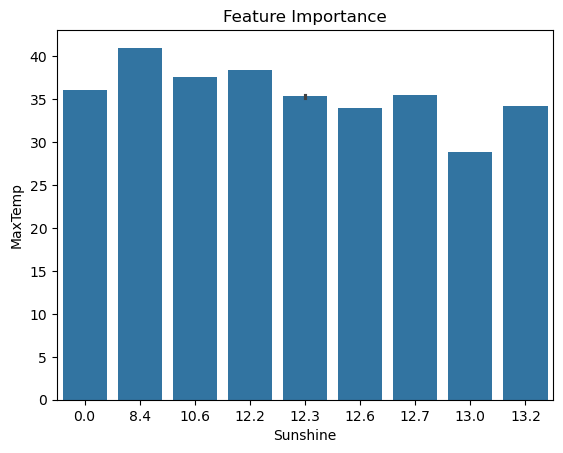

In [35]:
plt.title('Feature Importance')
sns.barplot(data.head(10), x='Sunshine', y='MaxTemp');

In [33]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


<Axes: >

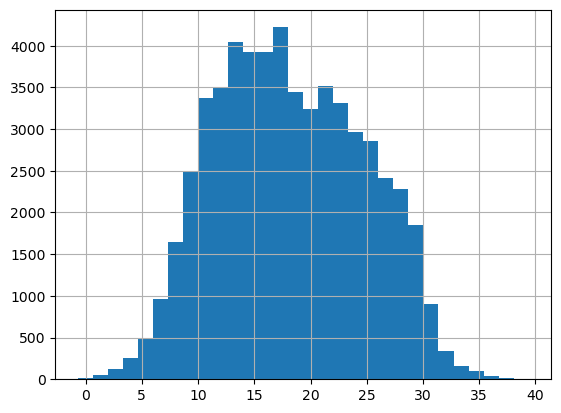

In [36]:
data['Temp9am'].hist(bins=30) # histplot  for Visualizing Data Distribution 

<Axes: xlabel='Temp9am', ylabel='MaxTemp'>

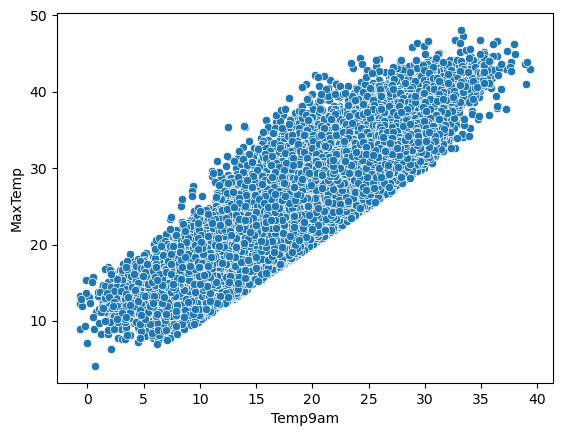

In [43]:
sns.scatterplot(data ,x='Temp9am',y='MaxTemp')

### DATA PREPROCESSING

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
x = data.drop("RainTomorrow",axis=1)
y = data["RainTomorrow"]

In [46]:
label_encoder = LabelEncoder()

In [47]:
for col in x.columns:
    x[col]=label_encoder.fit_transform(x[col])

In [48]:
x.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,407,4,227,283,0,120,123,11,21,1,...,10,20,13,170,177,2,5,270,280,0
6050,408,4,232,220,0,140,130,8,15,10,...,9,30,8,236,254,1,1,207,216,0
6052,410,4,242,307,0,108,106,5,20,5,...,7,42,22,230,225,1,6,291,295,0
6053,411,4,267,315,0,114,122,14,12,14,...,2,37,22,234,224,1,5,295,302,0
6054,412,4,290,341,0,112,84,14,14,7,...,6,19,15,214,207,1,6,340,322,0


In [50]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [51]:
mapper_rain={"No":0,"Yes":1}
y = y.map(mapper_rain)

In [52]:
y

6049      0
6050      0
6052      0
6053      0
6054      0
         ..
142298    0
142299    0
142300    0
142301    0
142302    0
Name: RainTomorrow, Length: 56420, dtype: int64

### SPLIT DATA 

In [55]:
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

In [56]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (39494, 22)
y_train shape =  (39494,)
x_test shape =  (16926, 22)
y_test shape =  (16926,)


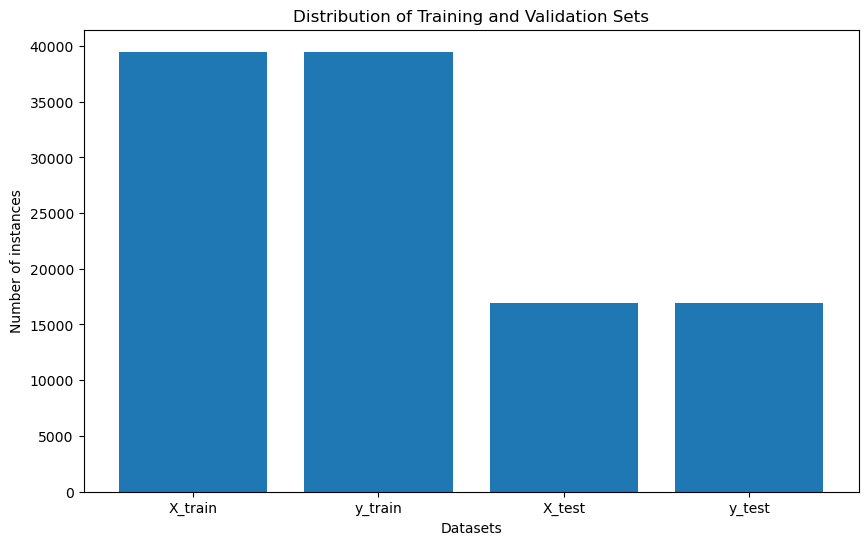

In [57]:
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(10, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Validation Sets')
plt.show()

### SCALING DATA 

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [61]:
x_train=scaler.fit_transform(x_train)

In [62]:
x_test=scaler.fit_transform(x_test)

### APPLY LOGISTIC REGRESSION

In [63]:
lr_model=LogisticRegression() # call model


In [64]:
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [65]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
 con= confusion_matrix(y_test,y_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis

<Axes: >

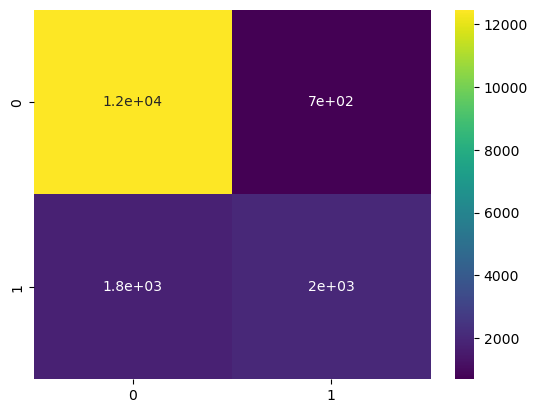

In [67]:
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) # heatmap for Matrix Data Representation

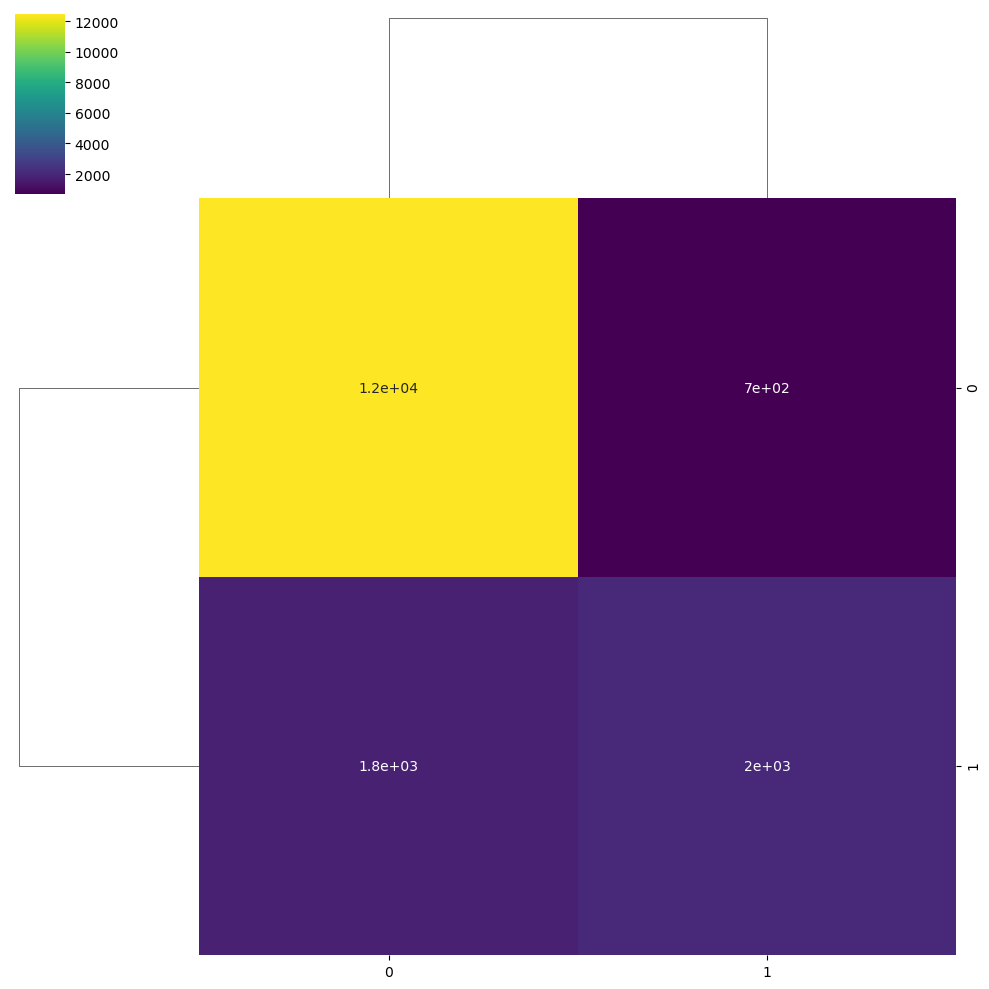

In [68]:
sns.clustermap(con, annot=True, cmap='viridis', cbar=True) # clustermap for Discovering Patterns and Relationships

In [69]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.88      0.95      0.91     13156
           1       0.74      0.53      0.62      3770

    accuracy                           0.86     16926
   macro avg       0.81      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



### KNN MODEL

In [70]:
knn_model = KNeighborsClassifier()

In [71]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [72]:
knn_pred = knn_model.predict(x_test)

In [73]:
knn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     13156
           1       0.69      0.52      0.59      3770

    accuracy                           0.84     16926
   macro avg       0.78      0.73      0.75     16926
weighted avg       0.83      0.84      0.83     16926



### GAUSSIANNB MODEL

In [75]:
nb_model = GaussianNB()

In [76]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [77]:
y_pred = nb_model.predict(x_test)

In [78]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     13156
           1       0.53      0.68      0.60      3770

    accuracy                           0.80     16926
   macro avg       0.72      0.76      0.73     16926
weighted avg       0.82      0.80      0.80     16926



## **Enhance Model Performance**

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:

from sklearn.model_selection import GridSearchCV

In [82]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(lr_model,
                           parameters,
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}])

In [85]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.90      0.83      0.86     13156
           1       0.53      0.68      0.60      3770

    accuracy                           0.80     16926
   macro avg       0.72      0.76      0.73     16926
weighted avg       0.82      0.80      0.80     16926



### THANKS FOR VISITIG 

### MORE UPVOTES AND COMMENTS PLZ